## Step 1: Reading the data

1. Go to [https://www.kaggle.com/c/titanic/data](https://www.kaggle.com/c/titanic/data)
2. If you scroll down the page a bit, you'll see a data dictionary explaining each of the columns. Take a minute to familiarize yourself with how the csv is structured.
4. Download the `train.csv` file into this lab folder.
3. Create an iPython notebook and load the csv into pandas.

In [266]:
import pandas as pd #importing pandas
import numpy as np #importing numpy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("train.csv") #reading excel file in same folder
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Step 2: Cleaning the data
1. Create a bar chart showing how many missing values are in each column
  - *Bonus* : Theres a good library for visualizing missing values called Missingno.
      - [Install Instructions](https://pypi.org/project/missingno/)
      - [Usage Documentation](https://github.com/ResidentMario/missingno)
2. Which column has the most `NaN` values? How many cells in that column are empty?
3. Delete all rows where `Embarked` is empty
4. Fill all empty cabins with **¯\\_(ツ)_/¯**

Note: `NaN`, empty, and missing are synonymous.


In [5]:
from quilt.data.ResidentMario import missingno_data


In [6]:
collisions = missingno_data.nyc_collision_factors() ##example of new missing no library##
collisions = collisions.replace("nan", np.nan)

In [7]:
import missingno as msno

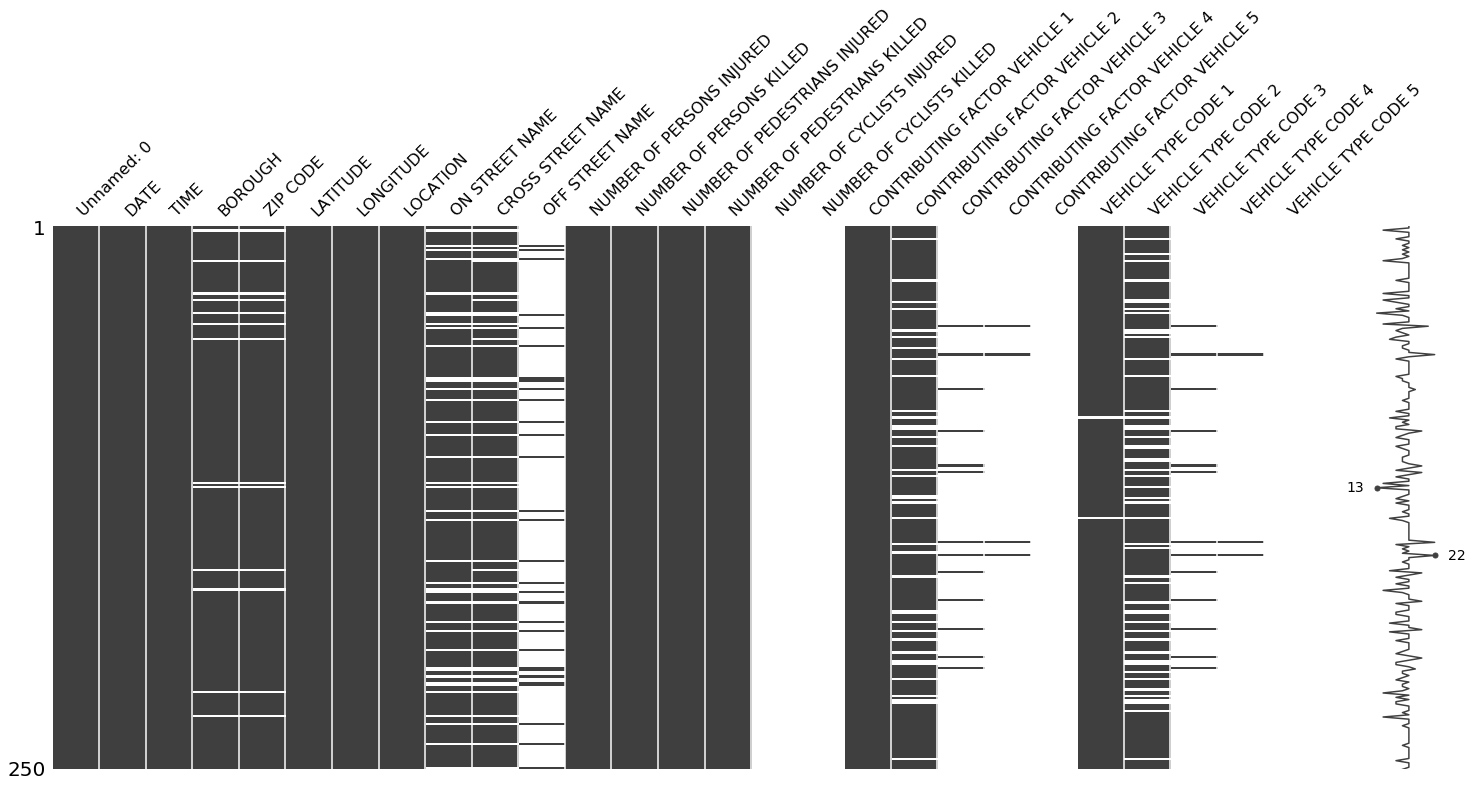

In [8]:
msno.matrix(collisions.sample(250))

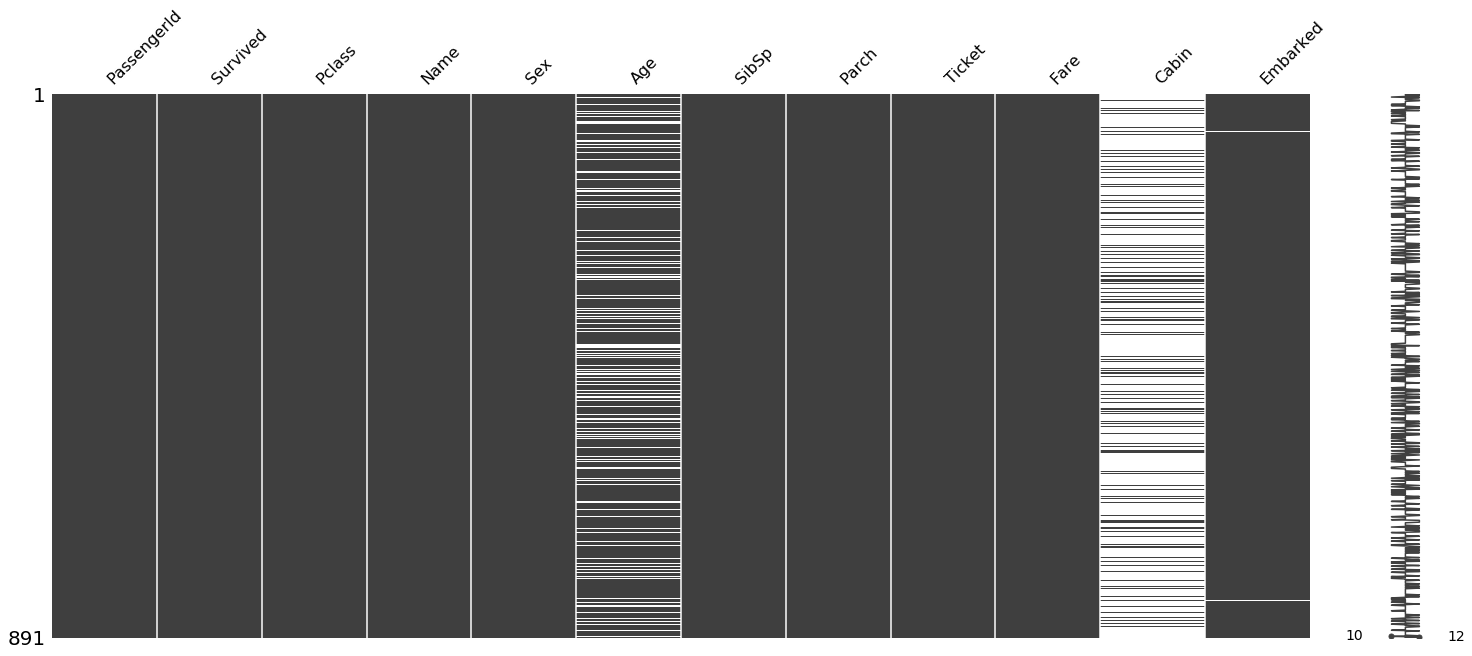

In [9]:
msno.matrix(df) #titanic df at a glance with missingno

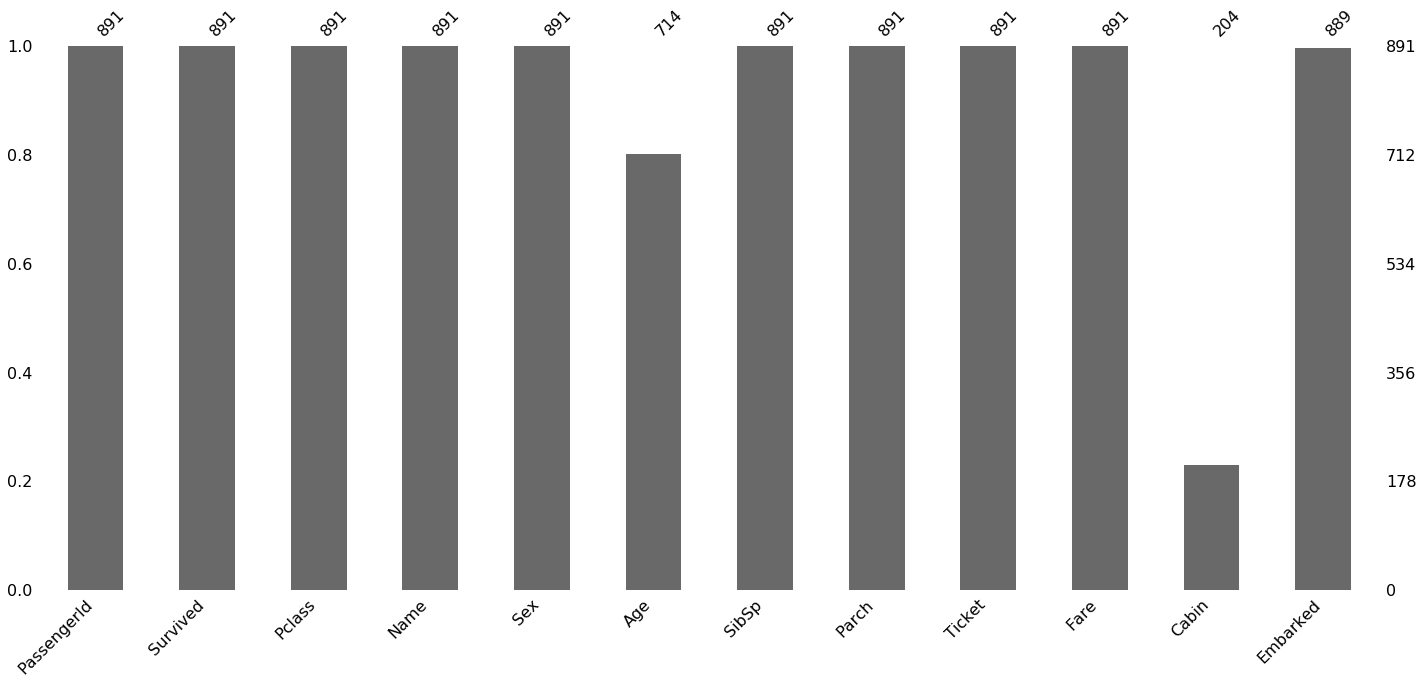

In [10]:
msno.bar(df) #bar plot with titanic df

Cabin and Age have the most NaN values with Cabin having 687 NaN values and Age having 177 NaN values.

In [11]:
df['Embarked'].sort_values(ascending=False) #two NaN values in Embarked confirmed

445      S
344      S
355      S
353      S
351      S
      ... 
354      C
125      C
258      C
61     NaN
829    NaN
Name: Embarked, Length: 891, dtype: object

In [12]:
#remove rows where embarked is empty
#https://thispointer.com/pandas-drop-rows-from-a-dataframe-with-missing-values-or-nan-in-columns/
df = df.dropna(how='any',subset=['Embarked'])

In [13]:
df.info() #891 rows reduced to 889 rows

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            712 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Cabin          202 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB


In [14]:
df['Embarked'].sort_values(ascending=False) #two rows subtracted according to the empty Embarked column condition

445    S
344    S
355    S
353    S
351    S
      ..
128    C
352    C
354    C
125    C
258    C
Name: Embarked, Length: 889, dtype: object

In [15]:
#Fill all empty cabins with ¯\_(ツ)_/¯
#https://www.dataquest.io/blog/pandas-cheat-sheet/
df['Cabin'].fillna('¯\_(ツ)_/¯',inplace=True)

/Users/tringuyen/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [16]:
df['Cabin'].head()

0    ¯\_(ツ)_/¯
1          C85
2    ¯\_(ツ)_/¯
3         C123
4    ¯\_(ツ)_/¯
Name: Cabin, dtype: object

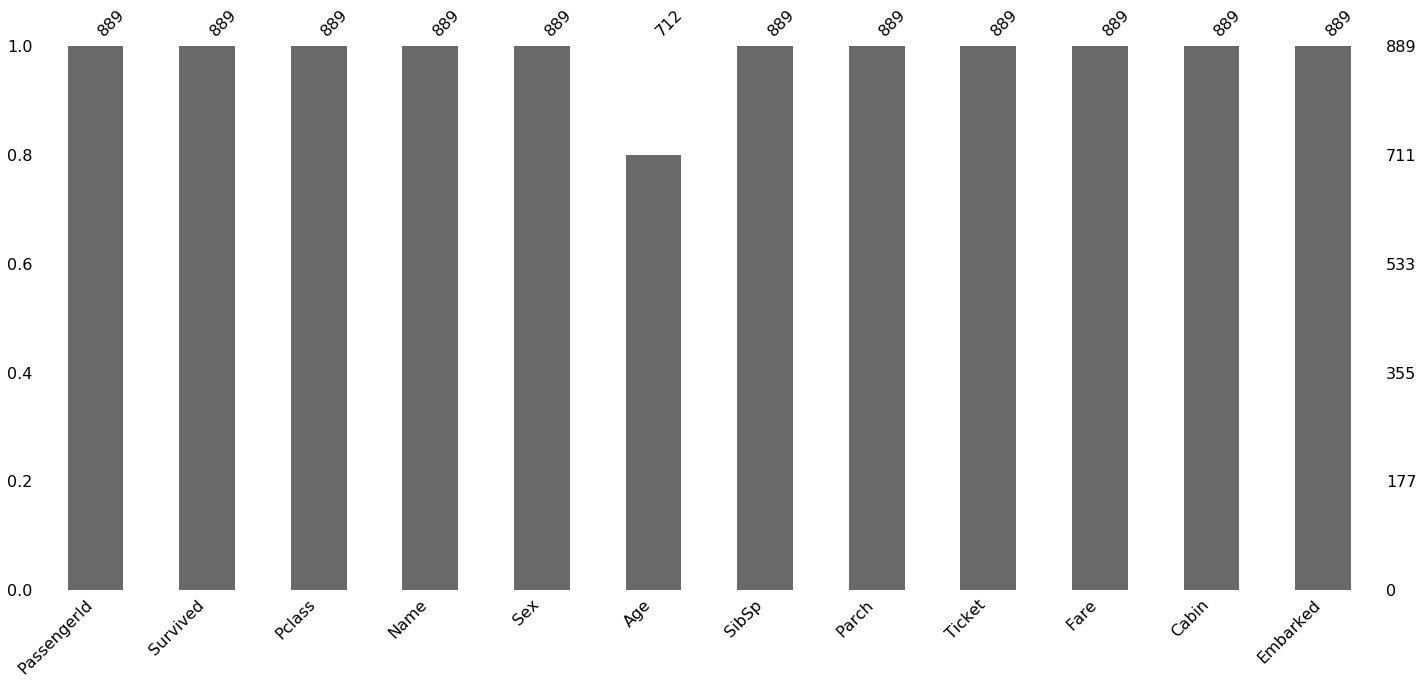

In [17]:
msno.bar(df) # Cabin is now filled


## Step 3: Feature extraction
1.  There are two columns that pertain to how many family members are on the boat for a given person. Create a new column called `FamilyCount` which will be the sum of those two columns.
2. Reverends have a special title in their name. Create a column called `IsReverend`: 1 if they're a preacher, 0 if they're not.
3. In order to feed our training data into a classification algorithm, we need to convert our categories into 1's and 0's using `pd.get_dummies`
  - Familiarize yourself with the [`pd.get_dummies` documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)
  - Create 3 columns: `Embarked_C`, `Embarked_Q` and `Embarked_S`. These columns will have 1's and 0's that correspond to the `C`, `Q` and `S` values in the `Embarked` column
  - Do the same thing for `Sex`
  - BONUS: Extract the title from everyone's name and create dummy columns


In [18]:
#grouped ticket number gives similar family names in the names column  
#FamilyCount = sum(df['Name'],df['Ticket'])

#FamilyCount #doesn't make sense for strings and integers added together

In [19]:
#https://www.kaggle.com/c/titanic/data
#sibsp & parch columns give integer values pertaining to family count of parent, child, sibling, and spouse
df['FamilyCount'] = df['SibSp']+df['Parch']

df['FamilyCount']

/Users/tringuyen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: FamilyCount, Length: 889, dtype: int64

In [37]:
df['Name'].str.contains('Rev.') #condition where reveren is met

0      False
1      False
2      False
3      False
4      False
       ...  
886     True
887    False
888    False
889    False
890    False
Name: Name, Length: 889, dtype: bool

In [43]:
#IsReverend 1 = preacher, 0 = not a preacher
#Rev. indicates Reverend in name; filtering by rev gives trevor
df['IsReverend'] = np.where(df['Name'].str.contains('Rev.'),1,0)

/Users/tringuyen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [44]:
df[df['IsReverend']==1] #seems to be 3 more Reverend than I counted by glancing

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend
149,150,0,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,244310,13.000,¯\_(ツ)_/¯,S,0,1
150,151,0,2,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.525,¯\_(ツ)_/¯,S,0,1
249,250,0,2,"Carter, Rev. Ernest Courtenay",male,54.0,1,0,244252,26.000,¯\_(ツ)_/¯,S,1,1
626,627,0,2,"Kirkland, Rev. Charles Leonard",male,57.0,0,0,219533,12.350,¯\_(ツ)_/¯,Q,0,1
848,849,0,2,"Harper, Rev. John",male,28.0,0,1,248727,33.000,¯\_(ツ)_/¯,S,1,1
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,¯\_(ツ)_/¯,S,0,1


In [46]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,¯\_(ツ)_/¯,S,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,¯\_(ツ)_/¯,S,3,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,0,0
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,¯\_(ツ)_/¯,Q,0,0


In [63]:
#create Embarked_C, Embarked_Q, and Embarked_S using pd.get_dummies
#https://towardsdatascience.com/the-dummys-guide-to-creating-dummy-variables-f21faddb1d40
ed = pd.get_dummies(df['Embarked'],'Embarked') #added in title not needing to rename the columns

#ed.rename(columns={'C': 'Embarked_C'})
#ed.rename(columns={'Q': 'Embarked_Q'})
#ed.rename(columns={'S': 'Embarked_S'})
ed

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [64]:
#sex column
sd = pd.get_dummies(df['Sex'])

sd

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [71]:
df = pd.concat([df, ed],axis=1) #adding embarked columns to df

In [72]:
df = pd.concat([df,sd],axis = 1) #adding sex columns to df


## Step 4: Exploratory analysis 
_[`df.groupby()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) may be very useful._

1. What was the survival rate overall?
2. Which gender fared the worst? What was their survival rate?
3. What was the survival rate for each `Pclass`?
4. Did any reverends survive? How many?
5. What is the survival rate for cabins marked **¯\\_(ツ)_/¯**
6. What is the survival rate for people whose `Age` is empty?
7. What is the survival rate for each port of embarkation?
8. What is the survival rate for children (under 12) in each `Pclass`?
9. Did the captain of the ship survive? Is he on the list?
10. Of all the people that died, who had the most expensive ticket? How much did it cost?
11. Does having family on the boat help or hurt your chances of survival?




In [78]:
#https://stackoverflow.com/questions/50558458/pandas-percentage-by-value-in-a-column
df['Survived'].value_counts(normalize=True) 

0    0.617548
1    0.382452
Name: Survived, dtype: float64

38% was the survival rate overall

In [130]:
display(df.groupby('Survived')['Sex'].value_counts(normalize=True))
#display(df.groupby('Sex')['Survived'].value_counts(normalize=True))

Survived  Sex   
0         male      0.852459
          female    0.147541
1         female    0.679412
          male      0.320588
Name: Sex, dtype: float64

Males fared the worst with 85% of the non-survivors being male while their survival rate is 32% in the survival category

In [138]:
df.groupby('Survived')['Pclass'].value_counts(normalize=True)

Survived  Pclass
0         3         0.677596
          2         0.176685
          1         0.145719
1         1         0.394118
          3         0.350000
          2         0.255882
Name: Pclass, dtype: float64

PClass 1, 2, 3 have a survival rate of 39%, 25%, and 35% respectively

In [142]:
df.groupby('Survived')['IsReverend'].value_counts(normalize=True)

Survived  IsReverend
0         0             0.989071
          1             0.010929
1         0             1.000000
Name: IsReverend, dtype: float64

No reverends survived the titanic.

In [145]:
df.groupby('Survived')['Cabin'].value_counts(normalize=True)

Survived  Cabin      
0         ¯\_(ツ)_/¯      0.876138
          C124           0.003643
          C22 C26        0.003643
          C23 C25 C27    0.003643
          D26            0.003643
                           ...   
1         E49            0.002941
          E50            0.002941
          E67            0.002941
          E68            0.002941
          F E69          0.002941
Name: Cabin, Length: 164, dtype: float64

The ¯\_(ツ)_/¯ cabin survival rate is 0 as they don't appear the survival group.

In [164]:
df.groupby('Survived')['Age'].value_counts(normalize=True, ascending=True, dropna=False) #dropna doesn't include Nan by default

Survived  Age 
0         3.0     0.001821
          6.0     0.001821
          14.5    0.001821
          15.0    0.001821
          20.5    0.001821
                    ...   
1         27.0    0.032353
          35.0    0.032353
          36.0    0.032353
          24.0    0.044118
          NaN     0.152941
Name: Age, Length: 144, dtype: float64

15% of the empty age column are in the survivor group

In [166]:
df.groupby('Survived')['Embarked'].value_counts(normalize=True)

Survived  Embarked
0         S           0.777778
          C           0.136612
          Q           0.085610
1         S           0.638235
          C           0.273529
          Q           0.088235
Name: Embarked, dtype: float64

Embarked S, C, and Q have a 63%, 27%, and 8% survival rate respectively in the survival group.

In [204]:
under12 = (df['Age'] < 12).map({True:'under 12', False:'over 12'})

df.groupby(by=[under12,'Pclass'])['Survived'].value_counts(normalize= True)

Age       Pclass  Survived
over 12   1       1           0.623810
                  0           0.376190
          2       0           0.580838
                  1           0.419162
          3       0           0.774775
                  1           0.225225
under 12  1       1           0.750000
                  0           0.250000
          2       1           1.000000
          3       0           0.595745
                  1           0.404255
Name: Survived, dtype: float64

For P class 1, 2, and 3, the survival rate for children under 12 is 75%, 100%, and 40% respectively.

In [225]:
#kaggle data shows captain on board with title Capt. in name
df[df['Name'].str.contains('Capt.')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,female,male
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0,B22,S,2,0,0,0,1,0,1


There was a captain but he died on the ship just like in the movie.

In [259]:
df.groupby('Name')['Fare'].max().sort_values()

Name
Knight, Mr. Robert J                    0.0000
Parkes, Mr. Francis "Frank"             0.0000
Reuchlin, Jonkheer. John George         0.0000
Fry, Mr. Richard                        0.0000
Frost, Mr. Anthony Wood "Archie"        0.0000
                                        ...   
Fortune, Mr. Charles Alexander        263.0000
Fortune, Miss. Mabel Helen            263.0000
Ward, Miss. Anna                      512.3292
Lesurer, Mr. Gustave J                512.3292
Cardeza, Mr. Thomas Drake Martinez    512.3292
Name: Fare, Length: 889, dtype: float64

Anna Ward, Gustave Lesurer, and Gardeza have the most expensive ticket coming in at $512.32

In [264]:
df.groupby('FamilyCount')['Survived'].mean()

FamilyCount
0     0.300935
1     0.552795
2     0.578431
3     0.724138
4     0.200000
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: Survived, dtype: float64

Having a family count of less than 4 helps the survival rate of the family

## Step 5: Plotting
Using Matplotlib and Seaborn, create several charts showing the survival rates of different groups of people. It's fine if a handful of charts are basic (Gender, Age, etc), but what we're really looking for is something beneath the surface.

In [265]:
df #glancing at df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,female,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\_(ツ)_/¯,S,1,0,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\_(ツ)_/¯,S,0,0,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\_(ツ)_/¯,S,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,¯\_(ツ)_/¯,S,0,1,0,0,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,0,0,0,1,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,¯\_(ツ)_/¯,S,3,0,0,0,1,1,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,0,1,0,0,0,1


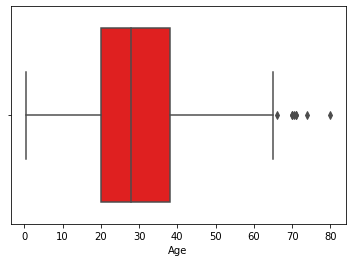

In [270]:
#age
sns.boxplot(df['Age'], color = 'r')

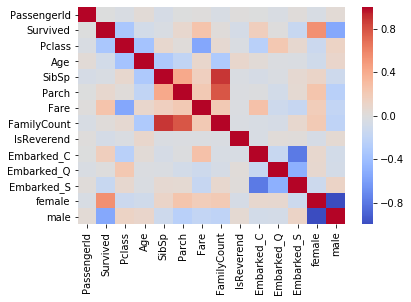

In [271]:
#correlations in the titanic dataframe
sns.heatmap(df.corr(), cmap='coolwarm')

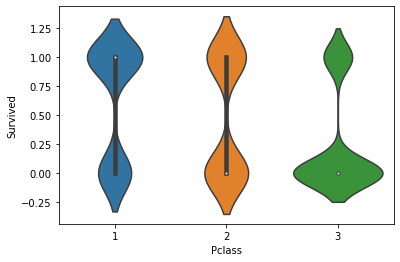

In [297]:
#Surival rate by passenger class
sns.violinplot(x='Pclass', y='Survived', data=df, order=[1,2,3])

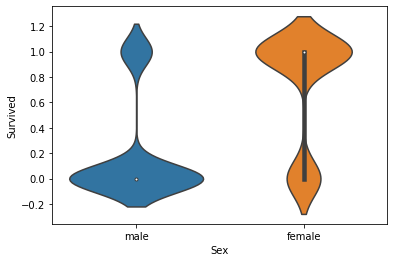

In [299]:
#Survival rate by gender
sns.violinplot(x='Sex', y='Survived', data=df)

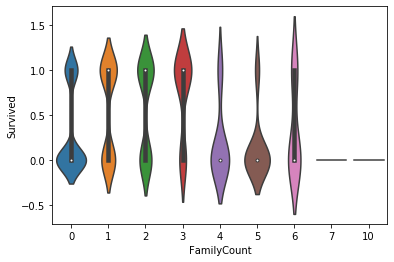

In [300]:
#Survival rate by familycount
sns.violinplot(x='FamilyCount', y='Survived', data=df)

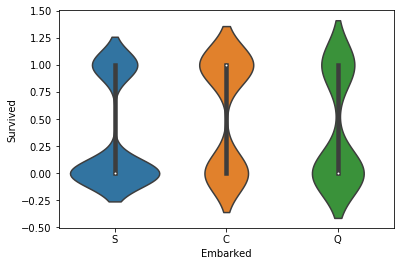

In [301]:
#Survival rate by embarkation
sns.violinplot(x='Embarked', y='Survived', data=df)